<a href="https://colab.research.google.com/github/AnnaMatlapudi/ml-project-1/blob/main/MoviesOnStreamingPlatform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/ruchi798/movies-and-tv-shows-eda/data?select=MoviesOnStreamingPlatforms_updated.csv

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#import the dataset
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [ ]:
df.copy().head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [ ]:
#drop unnecessary Unnamed column
df = df.drop(['Unnamed: 0','Type'],axis =1)

In [ ]:
#Display first five rows of dataset and rename a column
df.rename(columns = {'Rotten Tomatoes':'Rotten_Tomatoes' },inplace =True)

In [ ]:
df.dtypes

ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten_Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [ ]:
#Display structure of the dataset
df.shape

(9515, 15)

In [ ]:
#Display info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              5338 non-null   object 
 4   IMDb             9309 non-null   object 
 5   Rotten_Tomatoes  9508 non-null   object 
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Directors        9104 non-null   object 
 11  Genres           9399 non-null   object 
 12  Country          9261 non-null   object 
 13  Language         9202 non-null   object 
 14  Runtime          9196 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 1.1+ MB


In [ ]:
#Summary statistics of all columns
df.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Runtime
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9196.000000
mean,4758.000000,2007.422386,0.388334,0.110037,0.432265,0.096900,95.199435
std,2746.888239,19.130367,0.487397,0.312952,0.495417,0.295837,29.654047
min,1.000000,1914.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2379.500000,2006.000000,0.000000,0.000000,0.000000,0.000000,85.000000
50%,4758.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,7136.500000,2018.000000,1.000000,0.000000,1.000000,0.000000,109.000000
max,9515.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,566.000000


In [ ]:
#View null values
df.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                4177
IMDb                206
Rotten_Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Directors           411
Genres              116
Country             254
Language            313
Runtime             319
dtype: int64

In [ ]:
#Create new variable without N/A values
df = df.dropna(how ='any')
#df.shape

In [ ]:
df.isnull().sum()

ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten_Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

In [ ]:
#Converting the column and removing division by 100 
df.loc[:,'Rotten_Tomatoes'] = df['Rotten_Tomatoes'].map('{:.2}'.format)

In [ ]:
df['Rotten_Tomatoes']= pd.to_numeric(df['Rotten_Tomatoes'],errors ='raise')

In [ ]:
df['Rotten_Tomatoes'].dtypes

dtype('int64')

In [ ]:
#converting the column
df.loc[:, 'IMDb'] = df['IMDb'].map('{:.2}'.format)

In [ ]:
#Covert object IMDb to float datatype
df['IMDb'] = pd.to_numeric(df['IMDb'],errors = 'coerce')

In [ ]:
#Can also use astype to convert a object into float datatype
#df['IMDb'] = df['IMDb'].astype(float, errors = 'raise')

In [ ]:
df.IMDb.dtype

dtype('float64')

In [ ]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.0,98,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.0,97,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.0,94,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
5,6,To All the Boys I've Loved Before,2018,13+,7.0,94,1,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


In [ ]:
df.Age.unique()

array(['18+', '7+', '13+', '16+', 'all'], dtype=object)

In [ ]:
df.Age.isnull().any()

False

In [ ]:
#To get the order of Age column
df['Age']= df['Age'].map({'all':0,'7+':1,'13+':2,'16+':2,'18+':4,'all':5})

In [ ]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,4,7.0,98,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,1,8.0,97,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,1,9.0,95,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,1,8.0,94,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
5,6,To All the Boys I've Loved Before,2018,2,7.0,94,1,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


In [ ]:
#Display the correlation
df1 = df.corr()

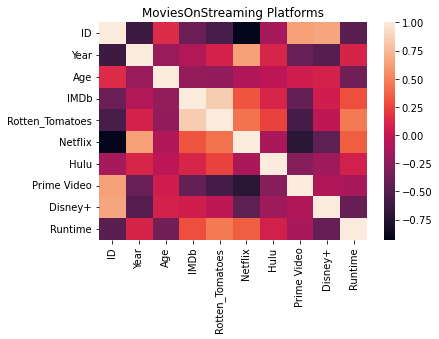

In [ ]:
#Display the heatmap
sns.heatmap(df1.corr())
plt.title('MoviesOnStreaming Platforms')
plt.show()

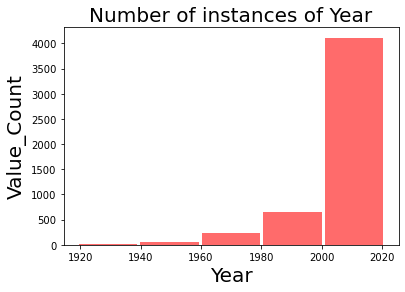

In [ ]:
#Plotting histogram
plt.hist(df.Year, bins = 5, rwidth = 0.95)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Value_Count', fontsize = 20)
plt.title('Number of instances of Year', fontsize = 20)
plt.show()

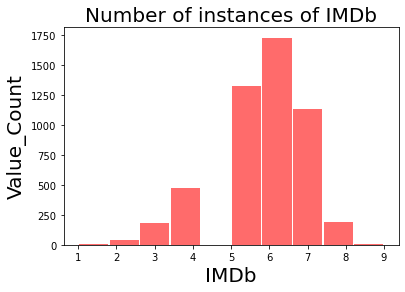

In [ ]:
# Ploting histogram for number of occurrences of numeric variable 'IMDB' in dataset. 

plt.hist(df.IMDb, bins = 10, rwidth = 0.95)
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Value_Count', fontsize = 20)
plt.title('Number of instances of IMDb', fontsize = 20)
plt.show()

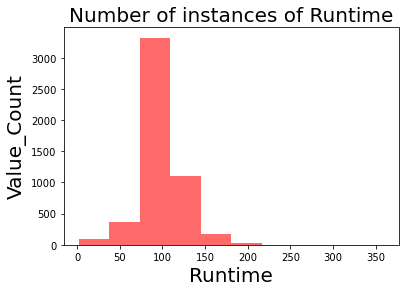

In [ ]:
# Plotting histogram for number of occurrences of numeric variable 'Runtime' in the dataset. 
plt.hist(df.Runtime, bins = 10)
plt.xlabel('Runtime', fontsize = 20)
plt.ylabel('Value_Count', fontsize = 20)
plt.title('Number of instances of Runtime', fontsize = 20)
plt.show()

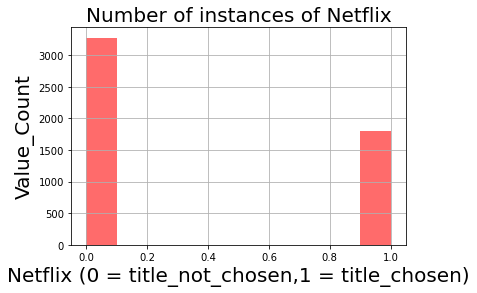

In [ ]:
# Plotting histogram for instances of 'Netflix' in the dataset. 

df.Netflix.hist()
plt.xlabel('Netflix (0 = title_not_chosen,1 = title_chosen)', fontsize = 20)
plt.ylabel('Value_Count', fontsize = 20)
plt.title('Number of instances of Netflix', fontsize = 20)
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

- Movies with the highest IMDb rating, genres and languages


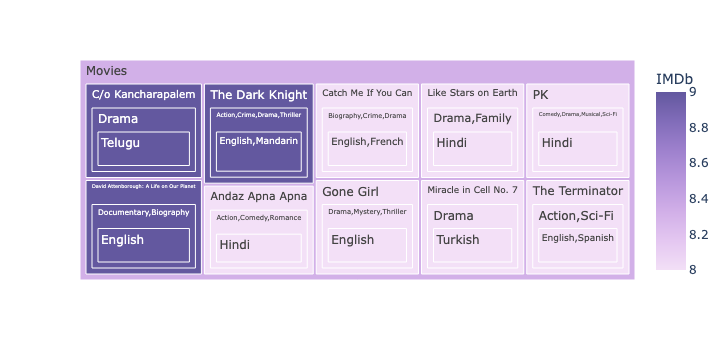

In [ ]:
r1 = df.sort_values(by ='IMDb', ascending = False)
r1 = r1[0:10]
r1['Movies']='Movies'
fig = px.treemap(r1, path =['Movies','Title','Genres','Language'], values ='IMDb',color ='IMDb',color_continuous_scale ='Purp')
fig.show()

- Movies with the highest Rotten Tomatoes rating vs directors

In [ ]:
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

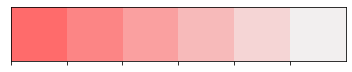

In [ ]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)


- Runtime of top 10 longest movies

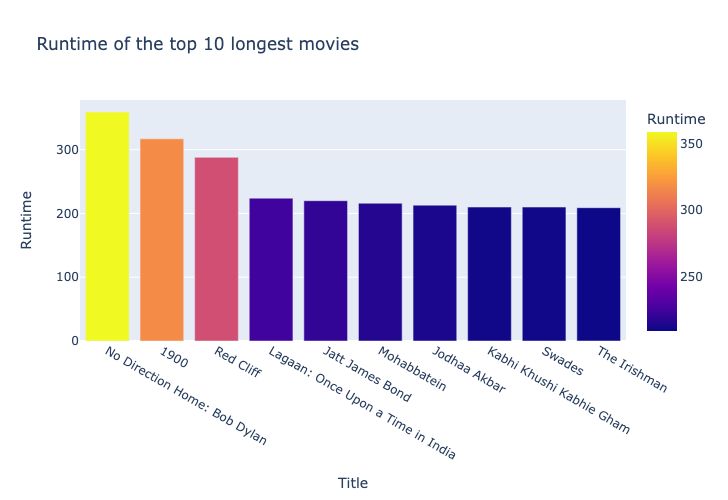

In [ ]:
longest_movies = df.sort_values('Runtime',ascending = False).head(10)
fig = px.bar(longest_movies, x ='Title', y ='Runtime', color ='Runtime', height = 500, title ='Runtime of the top 10 longest movies')
fig.show()

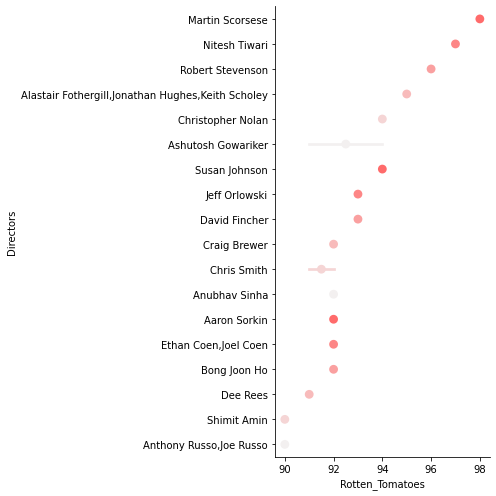

In [ ]:
df = df.sort_values(by = 'Rotten_Tomatoes', ascending = False)
rating = df[0:20]
sns.catplot(x = 'Rotten_Tomatoes', y = 'Directors',data = rating, palette = netflix_p,height=7,kind="point");

In [ ]:
def splitting(dataframe,col):
    result = dataframe[col].str.get_dummies(',')
    print('Done!')
    return result

In [ ]:
genres = splitting(df,'Genres')
lang = splitting(df,'Language')

Done!
Done!


- Languages and genres of movies on all platforms

In [ ]:
df_l_merged = pd.concat([df,lang], axis = 1, sort = False)
df_g_merged = pd.concat([df, genres], axis = 1, sort = False)

In [ ]:
def bar(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    val_counts = dataframe.iloc[:,15:].sum(axis=0).sort_values(ascending = False)
    val_counts2 = pd.DataFrame(val_counts,columns=['Number of movies' ])
    return val_counts2[0:20].style.bar(subset=["Number of movies", ], color = c)

In [ ]:
bar(df_l_merged,'Netflix','#ff6b6b')

,Number of movies
English,1360
Spanish,190
Hindi,182
French,138
German,65
Japanese,64
Italian,51
Mandarin,42
Russian,38
Arabic,37


In [ ]:
bar(df_g_merged,'Netflix','#ff6b6b')

,Number of movies
Drama,851
Comedy,767
Thriller,438
Action,369
Romance,336
Crime,264
Adventure,233
Family,211
Mystery,167
Fantasy,167


In [ ]:
bar(df_l_merged,'Hulu','#95d5b2')

,Number of movies
English,656
Spanish,57
French,53
German,32
Japanese,27
Russian,24
Italian,23
Korean,16
Mandarin,15
Swedish,12


In [ ]:
bar(df_g_merged,'Hulu','#a2d2ff')

,Number of movies
Drama,335
Comedy,247
Thriller,196
Action,155
Romance,132
Adventure,115
Horror,104
Crime,94
Sci-Fi,85
Fantasy,83


In [ ]:
bar(df_l_merged,'Prime Video','#a2d2ff')

,Number of movies
English,1905
French,120
Spanish,111
Hindi,85
German,72
Italian,53
Russian,39
Mandarin,33
Arabic,25
Japanese,25


In [ ]:
bar(df_g_merged,'Prime Video','#a2d2ff')

,Number of movies
Drama,1076
Comedy,704
Thriller,602
Action,435
Romance,384
Crime,322
Horror,260
Adventure,233
Family,191
Mystery,187


In [ ]:
bar(df_l_merged,'Disney+','#72efdd')

,Number of movies
English,651
French,39
Spanish,31
German,23
Italian,15
Mandarin,11
Japanese,10
None,8
Norwegian,7
Arabic,7


In [ ]:
bar(df_g_merged,'Disney+','#72efdd')

,Number of movies
Family,520
Comedy,358
Adventure,329
Fantasy,228
Animation,219
Drama,193
Action,109
Sci-Fi,108
Romance,101
Musical,94


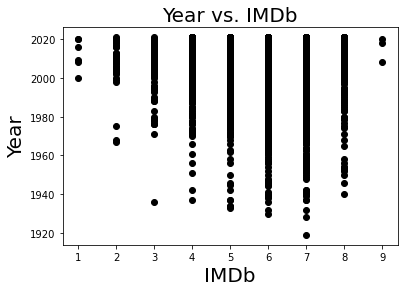

In [ ]:
plt.plot(df.IMDb, df.Year, 'o', color = 'black')
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Year', fontsize = 20)
plt.title('Year vs. IMDb', fontsize = 20)
plt.show()

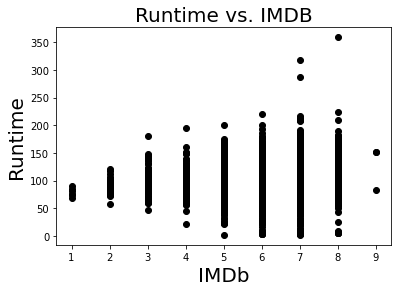

In [ ]:
plt.plot(df.IMDb, df.Runtime, 'o', color = 'black')
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Runtime', fontsize = 20)
plt.title('Runtime vs. IMDB', fontsize = 20)
plt.show()

In [ ]:
import scipy.stats as stats
from scipy.stats import norm
import math

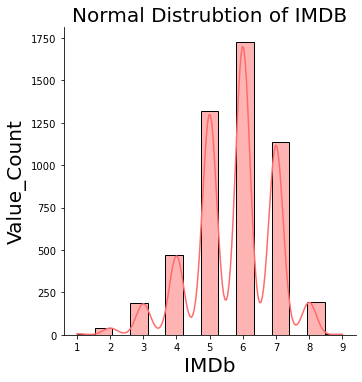

In [ ]:
 sns.displot(df['IMDb'], kde = True, bins = 15)
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Value_Count', fontsize = 20)
plt.title('Normal Distrubtion of IMDB', fontsize = 20)
plt.show()

In [ ]:
# Create PMF variable.

pmf = df.IMDb.value_counts().sort_index() / len(df.IMDb)

- pmf

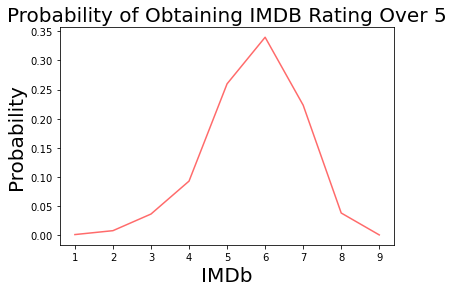

In [ ]:
# Plot probability mass function on line graph. 

pmf.plot(kind = 'line')
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.title('Probability of Obtaining IMDB Rating Over 5', fontsize = 20)
plt.show()

In [ ]:
# Create second Pmf. 
pmf_2 = df.Runtime.value_counts().sort_index() / len(df.Runtime)

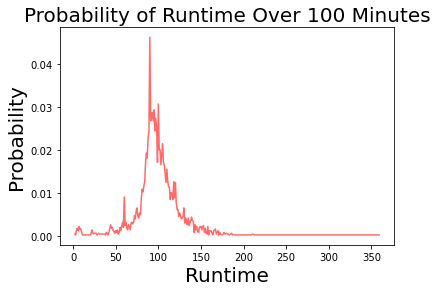

In [ ]:
# Plot PMF on line graph. 
pmf_2.plot(kind = 'line')
plt.xlabel('Runtime', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.title('Probability of Runtime Over 100 Minutes', fontsize = 20)
plt.show()

In [ ]:
counts, bin_edges = np.histogram(df['Year'], bins = 10, density = True)

In [ ]:
pdf = counts/(sum(counts))

In [ ]:
print(pdf)
print(bin_edges)

[3.93700787e-04 3.54330709e-03 4.13385827e-03 8.66141732e-03
 9.44881890e-03 3.56299213e-02 4.23228346e-02 8.62204724e-02
 2.07874016e-01 6.01771654e-01]
[1919.  1929.2 1939.4 1949.6 1959.8 1970.  1980.2 1990.4 2000.6 2010.8
 2021. ]


In [ ]:
cdf = np.cumsum(pdf)

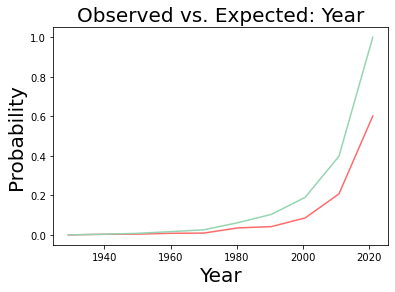

In [ ]:
# Plot PDF vs. CDF 
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.title('Observed vs. Expected: Year', fontsize = 20)
plt.show()

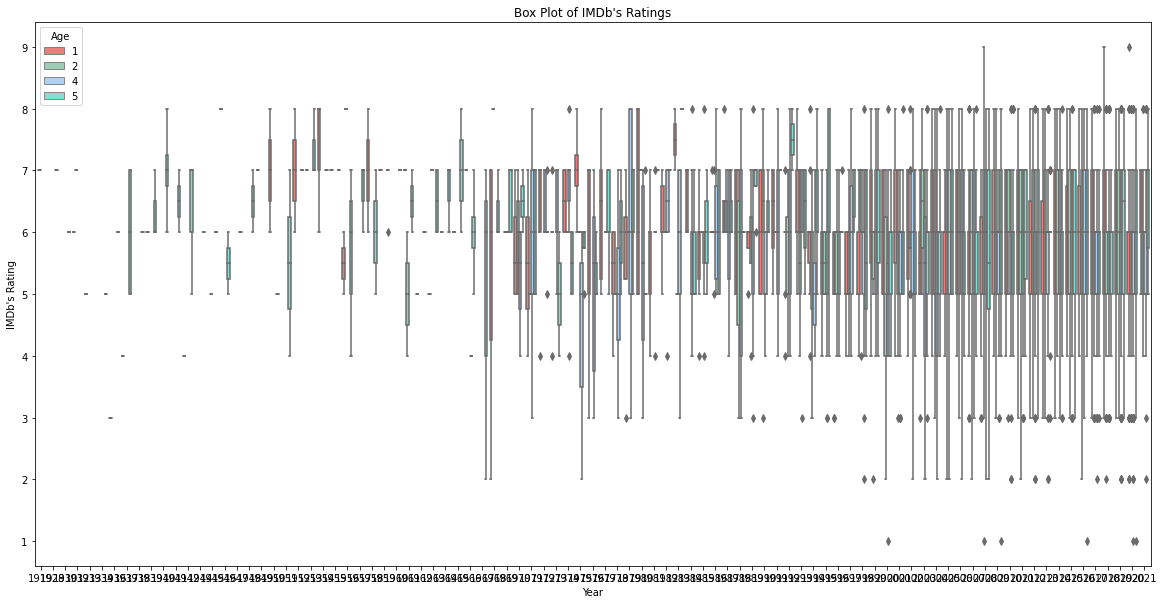

In [ ]:
# Draw the box plot
ax = plt.subplots(figsize =(20,10))
ax = sns.boxplot(x ='Year', y ='IMDb', hue ='Age',data = df)

# Plot formatting
plt.title('Box Plot of IMDb\'s Ratings')
plt.xlabel('Year')
plt.ylabel('IMDb\'s Rating');

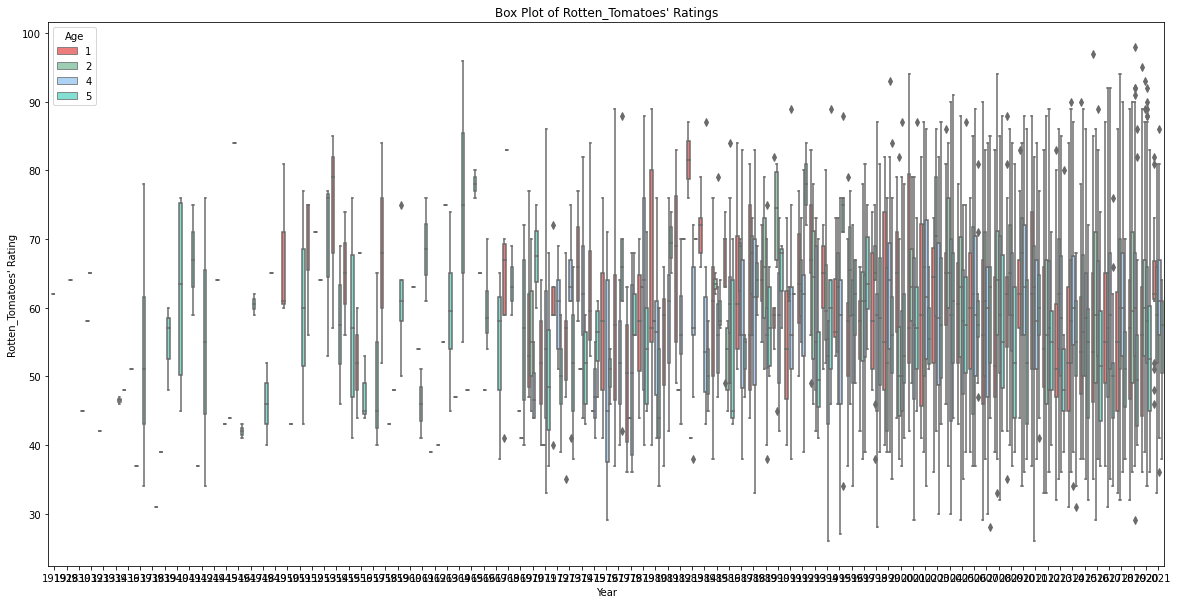

In [ ]:
# Draw the box plot
ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x ='Year', y ='Rotten_Tomatoes', hue = 'Age',
               data = df)

# Plot formatting
plt.title('Box Plot of Rotten_Tomatoes\' Ratings')
plt.xlabel('Year')
plt.ylabel('Rotten_Tomatoes\' Rating')